In [6]:
# from pymagnitude import Magnitude
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pymagnitude import *
file_path = "/Users/ShuangMa/Desktop/GWU_Documents/STAT_6289_Statistical_Deep_Learning/Homework/GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

In [7]:
vectors.distance("cat","dog")

0.69145405

In [8]:
print(vectors.similarity("cat", "dog"))

0.76094574


In [9]:
print(vectors.most_similar("cat", topn=1))

[('cats', 0.8099379)]


In [10]:
queen = vectors.query('queen')
king = vectors.query('king')

In [11]:
print(vectors.similarity(king,queen))

0.6510958


In [12]:
print(vectors.similarity('king','queen'))

0.6510958


In [13]:
len(vectors)

3000000

In [14]:
'cat' in vectors

True

In [15]:
type(vectors[2])

tuple

In [16]:
vectors.distance("cat", ["dog", "tiger"])

[0.69145405, 0.9825516]

In [17]:
vectors.similarity("cat", "television")

0.11826837

In [18]:
vectors.most_similar_to_given("cat", ["dog", "television", "laptop"])

'dog'

In [19]:
vectors.doesnt_match(["breakfast", "cereal", "dinner", "lunch"])

'cereal'

In [20]:
vectors.most_similar(positive = ["woman", "king"], negative = ["man"])

[('queen', 0.7118193),
 ('monarch', 0.61896753),
 ('princess', 0.5902431),
 ('crown_prince', 0.5499462),
 ('prince', 0.5377322),
 ('kings', 0.5236845),
 ('Queen_Consort', 0.5235946),
 ('queens', 0.5181134),
 ('sultan', 0.5098594),
 ('monarchy', 0.50874126)]

1. What is the dimensionality of these word embeddings?

In [21]:
vectors.dim

300

In [22]:
len(vectors.query('queen'))

300

2. What are the top 5 most similar words to picnic?

In [23]:
print(vectors.most_similar("picnic", topn=5))

[('picnics', 0.7400875), ('picnic_lunch', 0.721374), ('Picnic', 0.700534), ('potluck_picnic', 0.6683274), ('picnic_supper', 0.65189123)]


In [25]:
import pandas as pd
from pandas import DataFrame
similar = vectors.most_similar(vectors.query("picnic"), topn = 6)
similar2 = DataFrame(similar, columns = ['words', 'Similarity'])
print(similar2)

            words  Similarity
0          picnic    1.000000
1         picnics    0.740088
2    picnic_lunch    0.721374
3          Picnic    0.700534
4  potluck_picnic    0.668327
5   picnic_supper    0.651891


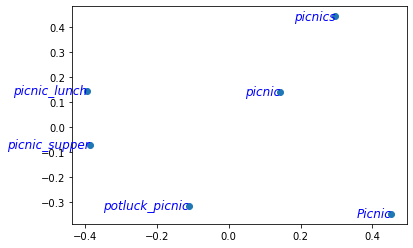

In [10]:
def word_plot(word_list):
    i = 1
    pca = PCA(n_components = 2)
    for word in word_list:
        coordinator = vectors.query(word)
        if i <= 1:
            w_list = vectors.query(word)
            i = i+1
        else:
            w_list = np.vstack((w_list,coordinator))
    result = pca.fit_transform(w_list)
    x = result[:,0]
    y = result[:,1]
    ax = plt.subplot(1,1,1)
    for j in range(len(word_list)):
        ax.text(x[j],y[j],word_list[j],fontsize=12,color='b',style='italic',weight='light',
               verticalalignment='center',horizontalalignment='right')
    ax.scatter(x,y)

word_list = ['picnic','picnics','picnic_lunch','Picnic','potluck_picnic','picnic_supper']
word_plot(word_list)
    

3. According to the word embeddings, which of these words is not like the others?['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']

In [29]:
vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

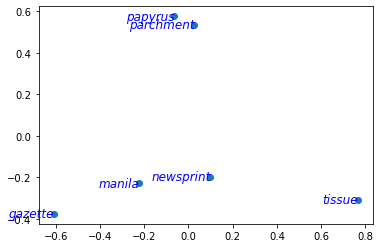

In [11]:
word_list = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
word_plot(word_list)

4. Solve the following analogy: leg is to jump as X is to throw.

In [33]:
result = vectors.most_similar(positive = ["leg","throw"], negative = ["jump"])

In [34]:
print(result[0])

('forearm', 0.48294652)


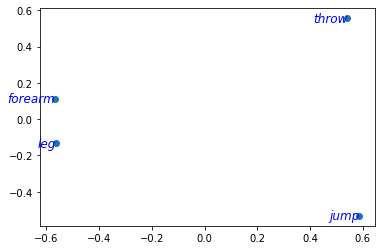

In [12]:
word_list = ["leg","throw","jump","forearm"]
word_plot(word_list)